# Sentiment Evaluation on Testset

Compare human annotated labels to rule-based assignment (using the policy: summing polarity scores from SentiWS) on Posts/Comments in Dev-/Testset.

In [1]:
import os

import numpy as np
import pandas as pd

from sklearn.metrics import (confusion_matrix, multilabel_confusion_matrix,
                             matthews_corrcoef, classification_report, accuracy_score)
from sklearn.utils.class_weight import compute_sample_weight

import matplotlib.pyplot as plt
%matplotlib inline

## Loading

In [2]:
data_path = "/mnt/DATA/NRW2019 Dropbox/data 4good/CSVData/TestData"
testset_fpath = os.path.join(data_path, "forSentAnalysis.csv")

testset = pd.read_csv(testset_fpath)
testset.shape

(1056, 7)

## Evaluation

Preprocessing

In [3]:
ratings_dict = {0: "positive", 10: "neutral", 20: "negative", 30: "offensive", -2: "notAssessable"}
sentiment_dict = {1: "positive", -1: "negative"}
testset.replace({"Rating": ratings_dict, "sentiment": sentiment_dict}, inplace=True)

testset["rating"] = testset.Rating.astype(str)
testset["sentiment"] = testset.sentiment.astype(str)

### Confusion Matrix

In [4]:
labels = ratings_dict = ["positive", "neutral", "negative", "offensive", "notAssessable"]
cm = confusion_matrix(testset.rating, testset.sentiment, labels=labels)

Matrix

In [5]:
cm_df = pd.DataFrame(cm, columns=labels, index=labels)
cm_df.index.name = "True"
cm_df

,positive,neutral,negative,offensive,notAssessable
True,,,,,
positive,69,0,28,0,0
neutral,83,0,153,0,0
negative,65,0,249,0,0
offensive,3,0,17,0,0
notAssessable,28,0,99,0,0


Plot

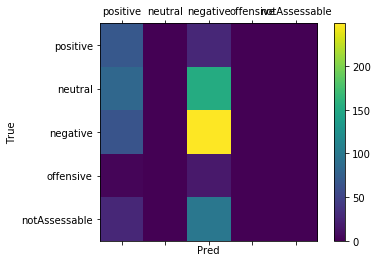

In [6]:
plot = plt.figure()
ax = plot.add_subplot(111)
cax = ax.matshow(cm)
plot.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Pred")
plt.ylabel("True")
plt.show()

### Confusion matrix 1 vs all

In [7]:
mcm = multilabel_confusion_matrix(testset.rating, testset.sentiment, labels=labels)

pos_df = pd.DataFrame(mcm[0], columns=["False", "True"], index=["False", "True"])
pos_df.index.name = "True"
print("Class 'positive':\n" , pos_df, "\n")

neg_df = pd.DataFrame(mcm[2], columns=["False", "True"], index=["False", "True"])
neg_df.index.name = "True"
print("Class 'negative':\n" , neg_df)

Class 'positive':
        False  True
True              
False    739   179
True      69    69 

Class 'negative':
        False  True
True              
False    363   297
True     147   249


### Correlation Score

Matthews Correlation Score: \[-1, 1\]

In [8]:
sample_weight = compute_sample_weight(class_weight="balanced", y=testset.rating)
corr_score = matthews_corrcoef(testset.rating, testset.sentiment, sample_weight=sample_weight)

print("Matthews Corr Score:", corr_score)

Matthews Corr Score: 0.10671342655368796


### Classification Report

In [9]:
print(classification_report(testset.rating, testset.sentiment, labels=labels))
print("Acc:", accuracy_score(testset.rating, testset.sentiment))

               precision    recall  f1-score   support

     positive       0.28      0.50      0.36       138
      neutral       0.00      0.00      0.00       311
     negative       0.46      0.63      0.53       396
    offensive       0.00      0.00      0.00        24
notAssessable       0.00      0.00      0.00       187

    micro avg       0.40      0.30      0.34      1056
    macro avg       0.15      0.23      0.18      1056
 weighted avg       0.21      0.30      0.24      1056

Acc: 0.30113636363636365


/home/datadonk23/anaconda3/envs/WBNRW19/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Evaluation on Subset

Only positive and negative labeled texts are used here for evaluation, as these are the only classes the applied Sentiment Analysis approach is capable to supply.  
_Attention_: This forced binary procedure is a cheat, but should complete the picture on performance of this specific rule-based Sentiment Analysis approach.

In [10]:
posneg_subset = testset.loc[(testset.rating == "positive") | (testset.rating == "negative")]
posneg_subset.shape

(534, 8)

Confusion matrix

In [11]:
labels = ratings_dict = ["positive", "negative"]
cm_subset = confusion_matrix(posneg_subset.rating, posneg_subset.sentiment, labels=labels)

cm_df = pd.DataFrame(cm_subset, columns=labels, index=labels)
cm_df.index.name = "True"
cm_df

,positive,negative
True,,
positive,69,28
negative,65,249


Correlation Score

In [12]:
sample_weight = compute_sample_weight(class_weight="balanced", y=posneg_subset.rating)
corr_score = matthews_corrcoef(posneg_subset.rating, posneg_subset.sentiment, sample_weight=sample_weight)

print("Matthews Corr Score:", corr_score)

Matthews Corr Score: 0.33321500611480026


Classification report

In [13]:
print(classification_report(posneg_subset.rating, posneg_subset.sentiment, labels=labels))
print("Acc:", accuracy_score(posneg_subset.rating, posneg_subset.sentiment))

              precision    recall  f1-score   support

    positive       0.51      0.50      0.51       138
    negative       0.90      0.63      0.74       396

   micro avg       0.77      0.60      0.67       534
   macro avg       0.71      0.56      0.62       534
weighted avg       0.80      0.60      0.68       534

Acc: 0.5955056179775281


# Conclusion

Over all, the performance of rule-based assignment (using the policy: summing polarity scores from SentiWS) on Posts/Comments in Dev-/Testset is poor and therefore should not be used for Sentiment Analysis on the final corpus of Social Media texts. It appears that it is better capable to detect negative sentiment than positive. Nonetheless, even this specific capablitity is rather limited and therefore does not suggest usage in production.